In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The team wants to analyze each variable of the data collected through data summarization to get a basic understanding of the dataset and to prepare for further analysis.

In [5]:
data = pd.read_excel("C:/Users/prade/Downloads/project3 (1) (1).xlsx")
data

,Bounces,Exits,Continent,Sourcegroup,Timeinpage,Uniquepageviews,Visits,BouncesNew
0,0,0,OC,(direct),18,1,0,0.00
1,0,0,N.America,(direct),4,1,0,0.00
2,0,0,N.America,Others,35,1,0,0.00
3,0,0,N.America,public.tableausoftware.com,70,1,0,0.00
4,0,0,N.America,public.tableausoftware.com,81,1,0,0.00
...,...,...,...,...,...,...,...,...
32104,1,1,N.America,public.tableausoftware.com,12,2,2,0.01
32105,2,2,N.America,(direct),0,2,2,0.02
32106,2,2,N.America,(direct),0,2,2,0.02
32107,2,2,N.America,(direct),0,2,2,0.02


In [7]:
data.describe()

,Bounces,Exits,Timeinpage,Uniquepageviews,Visits,BouncesNew
count,32109.000000,32109.000000,32109.000000,32109.000000,32109.000000,32109.000000
mean,0.713009,0.906039,73.184746,1.114329,0.906039,0.007130
std,0.708215,0.695819,394.441111,0.614880,0.730068,0.007082
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.010000
75%,1.000000,1.000000,10.000000,1.000000,1.000000,0.010000
max,30.000000,36.000000,46745.000000,45.000000,45.000000,0.300000


In [9]:
data.isnull().sum()

Bounces            0
Exits              0
Continent          0
Sourcegroup        0
Timeinpage         0
Uniquepageviews    0
Visits             0
BouncesNew         0
dtype: int64

In [21]:
continent_counts = data['Continent'].value_counts()
continent_counts

Continent
N.America    20043
EU            6470
AS            3171
OC            1356
SA             748
AF             321
Name: count, dtype: int64

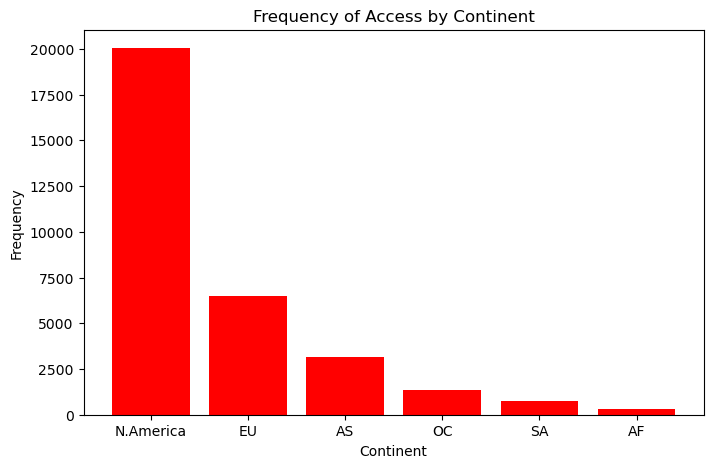

In [27]:
plt.figure(figsize=(8, 5))
plt.bar(continent_counts.index, continent_counts.values, color='red')
plt.title("Frequency of Access by Continent")
plt.xlabel("Continent")
plt.ylabel("Frequency")
plt.show()

In [29]:
source_grp_count = data['Sourcegroup'].value_counts()
source_grp_count

Sourcegroup
google                        11542
(direct)                       7532
Others                         5360
tableausoftware.com            2388
t.co                           2249
public.tableausoftware.com     1354
visualisingdata.com             976
reddit.com                      616
facebook                         92
Name: count, dtype: int64

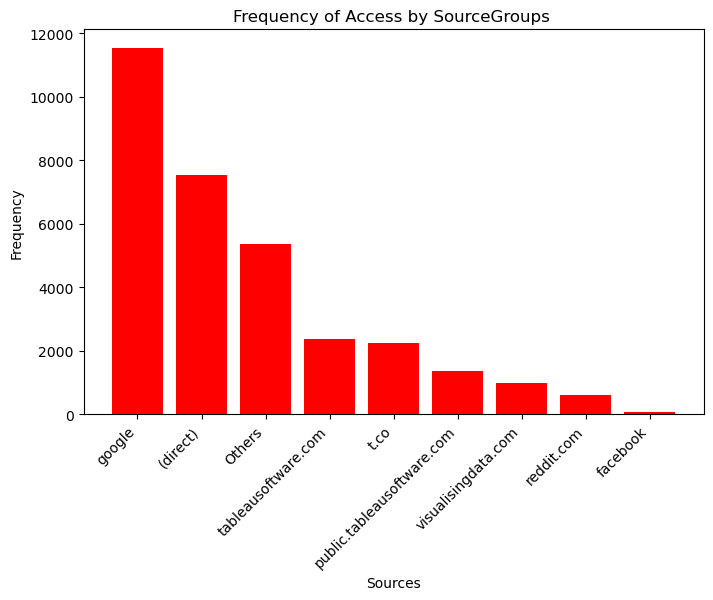

In [39]:
plt.figure(figsize=(8, 5))
plt.bar(source_grp_count.index, source_grp_count.values, color='red')
plt.title("Frequency of Access by SourceGroups ")
plt.xlabel("Sources")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Frequency")
plt.show()

In [43]:
continent_group = data.groupby('Continent').agg({'Visits': 'mean', 'Uniquepageviews': 'mean', 'Bounces': 'mean'})
continent_group


,Visits,Uniquepageviews,Bounces
Continent,,,
AF,0.884735,1.052960,0.719626
AS,0.908546,1.071271,0.731000
EU,0.898145,1.075116,0.713447
N.America,0.908846,1.137904,0.707878
OC,0.902655,1.070796,0.740413
SA,0.903743,1.109626,0.717914


In [45]:
source_group = data.groupby('Sourcegroup').agg({'Visits': 'mean', 'Uniquepageviews': 'mean', 'Bounces': 'mean'})
source_group

,Visits,Uniquepageviews,Bounces
Sourcegroup,,,
(direct),1.016994,1.225969,0.832315
Others,0.833396,1.067351,0.636754
facebook,1.076087,1.108696,0.913043
google,0.938919,1.069572,0.756455
public.tableausoftware.com,0.647710,1.122600,0.333087
reddit.com,0.943182,1.086039,0.803571
t.co,0.928857,1.145843,0.766118
tableausoftware.com,0.737437,1.072027,0.505444
visualisingdata.com,0.738730,1.077869,0.533811


As mentioned earlier, a unique page view represents the number of sessions during which that page was viewed one or more times. A visit counts all instances, no matter how many times the same visitor may have been to your site. So the team needs to know whether the unique page view value depends on visits.



Conclusion: So the unique page view value depends on the visit.

In [53]:
correlation = np.corrcoef(data['Uniquepageviews'], data['Visits'])[0, 1]
print(f"Correlation coefficient between Unique Page Views and Visits: {correlation:.2f}")

Correlation coefficient between Unique Page Views and Visits: 0.81


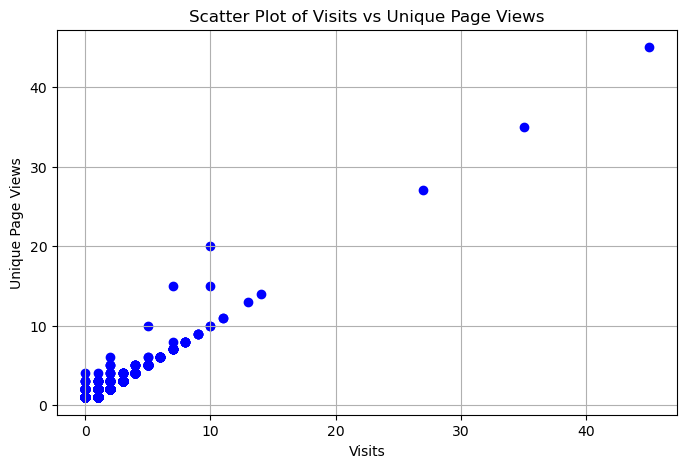

In [103]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Visits'], data['Uniquepageviews'], color='blue')
plt.title("Scatter Plot of Visits vs Unique Page Views")
plt.xlabel("Visits")
plt.ylabel("Unique Page Views")
plt.grid(True)
plt.show()

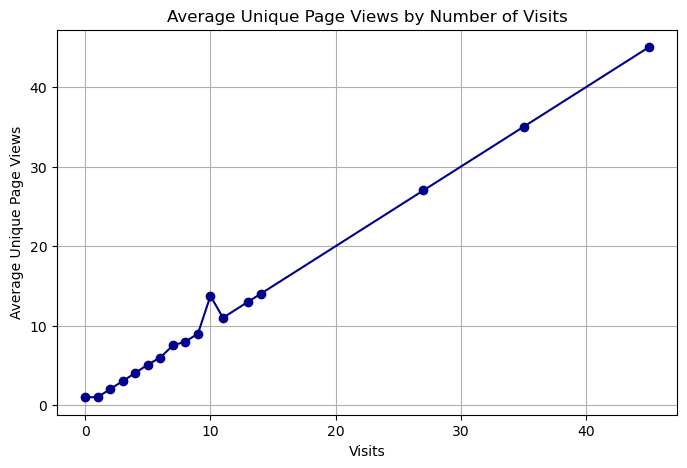

In [70]:
visit_group = data.groupby('Visits')['Uniquepageviews'].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(8, 5))
plt.plot(visit_group['Visits'], visit_group['Uniquepageviews'], marker='o', color='darkblue')
plt.title("Average Unique Page Views by Number of Visits")
plt.xlabel("Visits")
plt.ylabel("Average Unique Page Views")
plt.grid(True)
plt.show()

Find out the probable factors from the dataset, which could affect the exits. Exit Page Analysis is usually required to get an idea about why a user leaves the website for a session and moves on to another one. Please keep in mind that exits should not be confused with bounces.

Conclusion : bounces, Continent ( north america and Asia) , source group (facebook and idrect)

In [79]:
#avg exits by continent
continent_exits = data.groupby('Continent')['Exits'].mean().sort_values(ascending=False)
continent_exits

Continent
N.America    0.908846
AS           0.908546
SA           0.903743
OC           0.902655
EU           0.898145
AF           0.884735
Name: Exits, dtype: float64

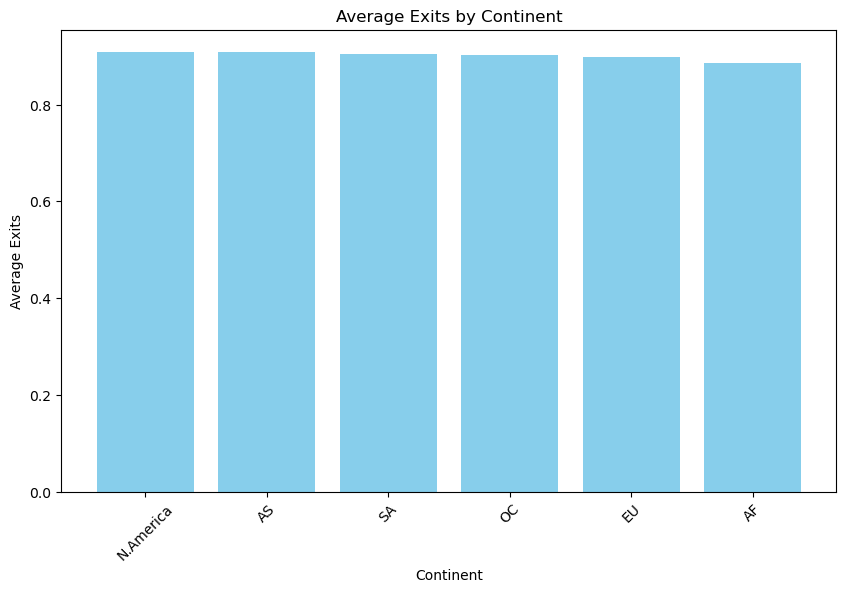

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(continent_exits.index, continent_exits.values, color='skyblue')
plt.title("Average Exits by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Exits")
plt.xticks(rotation=45)
plt.show()

In [99]:
#avg exits by sourcegrp
sourcegroup_exits = data.groupby('Sourcegroup')['Exits'].mean().sort_values(ascending=False)
sourcegroup_exits

Sourcegroup
facebook                      1.076087
(direct)                      1.016861
reddit.com                    0.943182
google                        0.939179
t.co                          0.928857
Others                        0.833022
visualisingdata.com           0.738730
tableausoftware.com           0.737437
public.tableausoftware.com    0.647710
Name: Exits, dtype: float64

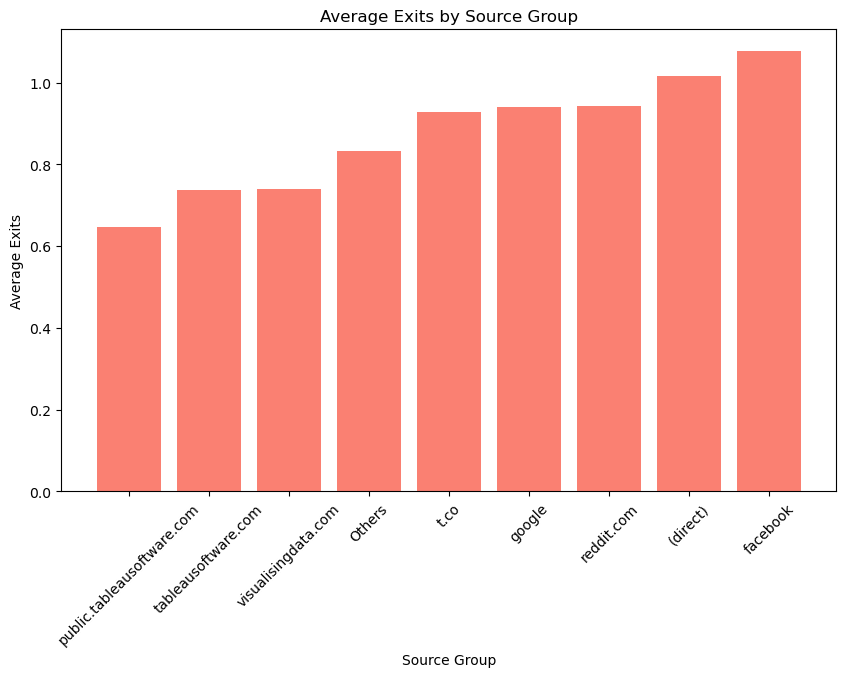

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(sourcegroup_exits.index, sourcegroup_exits.values, color='salmon')
plt.title("Average Exits by Source Group")
plt.xlabel("Source Group")
plt.ylabel("Average Exits")
plt.xticks(rotation=45)
plt.show()

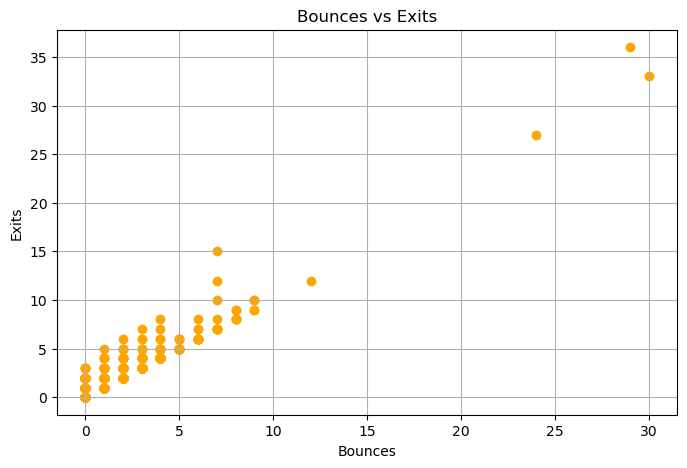

In [85]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Bounces'], data['Exits'],color='orange')
plt.title("Bounces vs Exits")
plt.xlabel("Bounces")
plt.ylabel("Exits")
plt.grid(True)
plt.show()

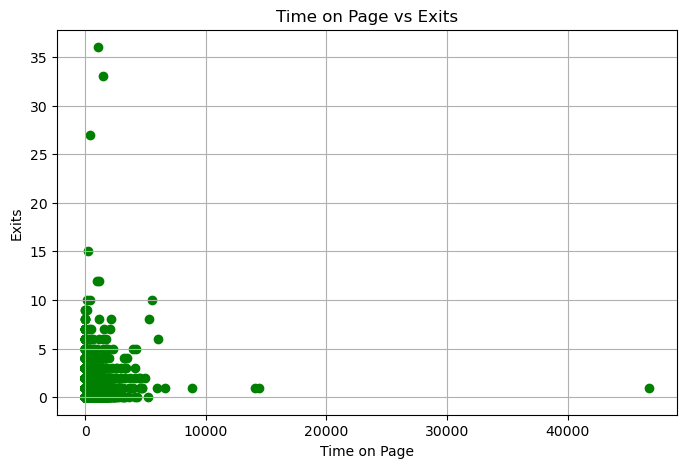

In [87]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Timeinpage'], data['Exits'], color='green')
plt.title("Time on Page vs Exits")
plt.xlabel("Time on Page")
plt.ylabel("Exits")
plt.grid(True)
plt.show()

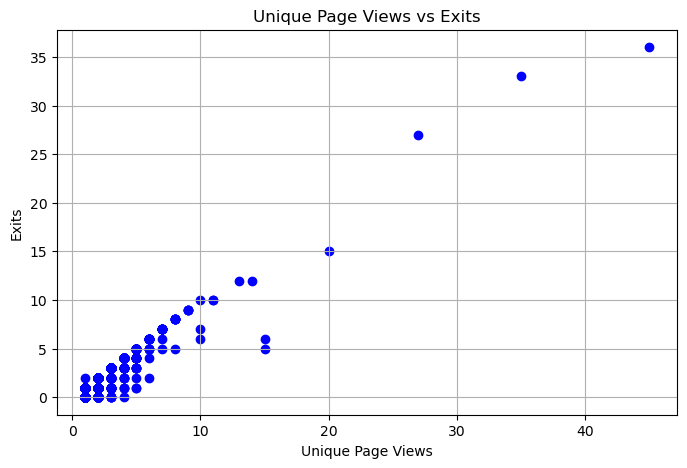

In [89]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Uniquepageviews'], data['Exits'],color='blue')
plt.title("Unique Page Views vs Exits")
plt.xlabel("Unique Page Views")
plt.ylabel("Exits")
plt.grid(True)
plt.show()

Every site wants to increase the time on page for a visitor. This increases the chances of the visitor understanding the site content better and hence there are more chances of a transaction taking place. Find the variables which possibly have an effect on the time on page.

Conclusion : Continent and source group but also bounces is not a strong variable

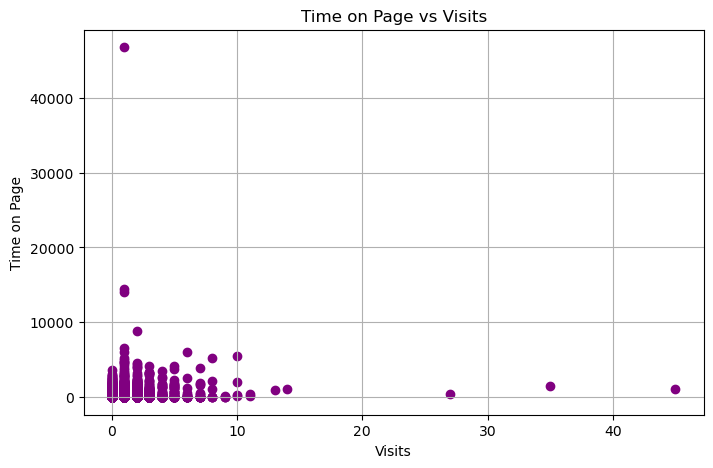

In [124]:
#Time on Page vs Visits
plt.figure(figsize=(8, 5))
plt.scatter(data['Visits'], data['Timeinpage'],color='purple')
plt.title("Time on Page vs Visits")
plt.xlabel("Visits")
plt.ylabel("Time on Page")
plt.grid(True)
plt.show()

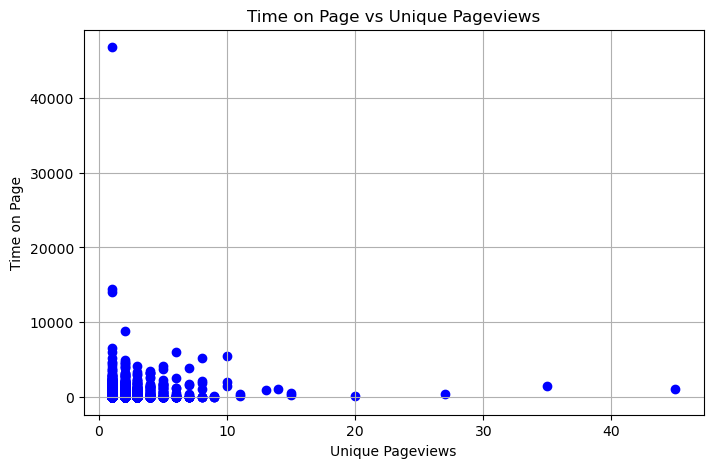

In [110]:
#Time on Page vs Unique Pageviews
plt.figure(figsize=(8, 5))
plt.scatter(data['Uniquepageviews'], data['Timeinpage'], color='blue')
plt.title("Time on Page vs Unique Pageviews")
plt.xlabel("Unique Pageviews")
plt.ylabel("Time on Page")
plt.grid(True)
plt.show()


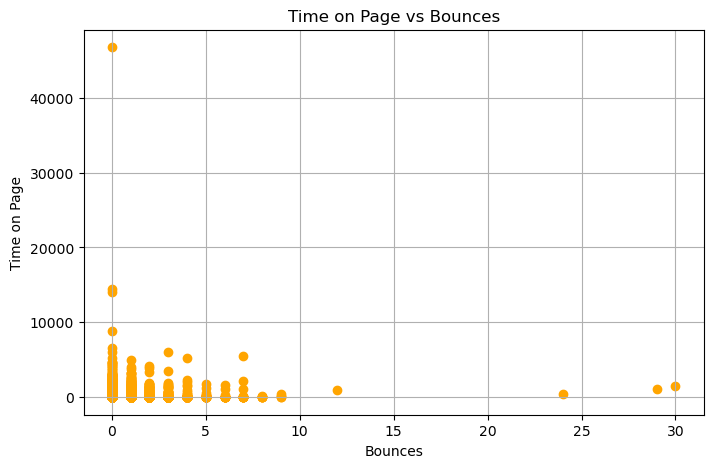

In [112]:
#Time on Page vs Bounces
plt.figure(figsize=(8, 5))
plt.scatter(data['Bounces'], data['Timeinpage'], color='orange')
plt.title("Time on Page vs Bounces")
plt.xlabel("Bounces")
plt.ylabel("Time on Page")
plt.grid(True)
plt.show()


In [116]:
continent_time_avg = data.groupby('Continent')['Timeinpage'].mean()
continent_time_avg

Continent
AF            55.227414
AS            60.848944
EU            60.364142
N.America     77.560744
OC            66.235251
SA           139.422460
Name: Timeinpage, dtype: float64

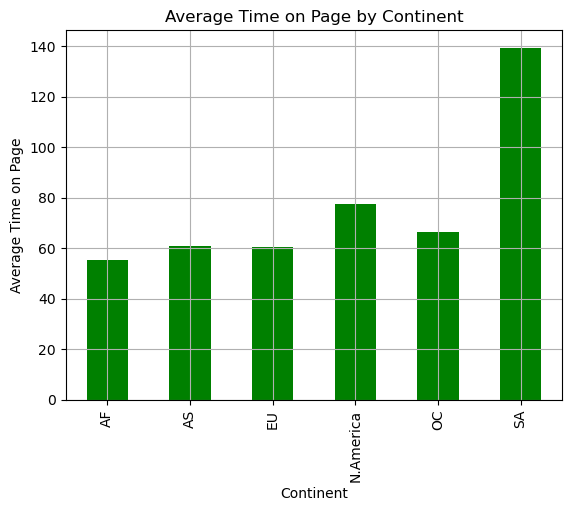

In [118]:
continent_time_avg.plot(kind='bar', color='green')
plt.title("Average Time on Page by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Time on Page")
plt.grid(True)
plt.show()

In [120]:
sourcegroup_time_avg = data.groupby('Sourcegroup')['Timeinpage'].mean()
sourcegroup_time_avg

Sourcegroup
(direct)                       70.708178
Others                         70.377239
facebook                       57.206522
google                         67.314070
public.tableausoftware.com    134.321270
reddit.com                     49.198052
t.co                           69.923522
tableausoftware.com            90.845896
visualisingdata.com            73.274590
Name: Timeinpage, dtype: float64

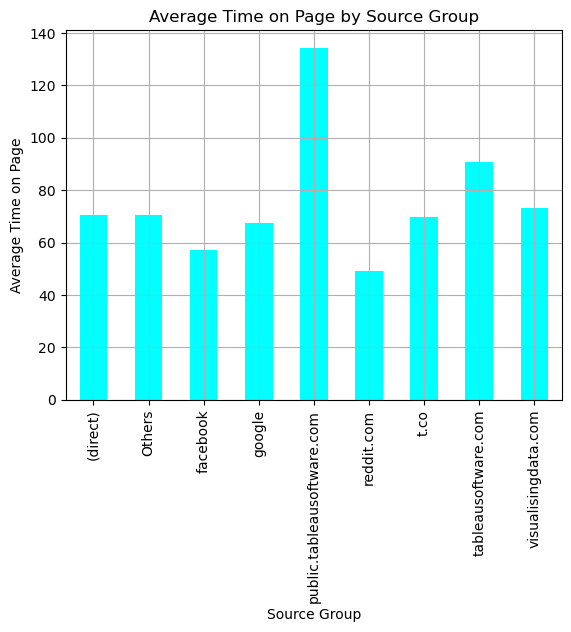

In [122]:
sourcegroup_time_avg.plot(kind='bar', color='cyan')
plt.title("Average Time on Page by Source Group")
plt.xlabel("Source Group")
plt.ylabel("Average Time on Page")
plt.grid(True)
plt.show()

In [126]:
corr_visits_time = data['Visits'].corr(data['Timeinpage'])
corr_unique_pageviews_time = data['Uniquepageviews'].corr(data['Timeinpage'])
corr_bounces_time = data['Bounces'].corr(data['Timeinpage'])
print(f"Correlation between Visits and Time on Page: {corr_visits_time:.4f}")
print(f"Correlation between Unique Pageviews and Time on Page: {corr_unique_pageviews_time:.4f}")
print(f"Correlation between Bounces and Time on Page: {corr_bounces_time:.4f}")

Correlation between Visits and Time on Page: 0.0666
Correlation between Unique Pageviews and Time on Page: 0.1146
Correlation between Bounces and Time on Page: -0.1091


A high bounce rate is a cause of alarm for websites which depend on visitor engagement. Help the team in determining the factors that are impacting the bounce.

Conclusion : Source Groups, Visits and Unique pages.

In [130]:
corr_bounces_visits = data['Bounces'].corr(data['Visits'])
corr_bounces_unique_pageviews = data['Bounces'].corr(data['Uniquepageviews'])
corr_bounces_time = data['Bounces'].corr(data['Timeinpage'])

print(f"Correlation between Bounces and Visits: {corr_bounces_visits:.4f}")
print(f"Correlation between Bounces and Unique Pageviews: {corr_bounces_unique_pageviews:.4f}")
print(f"Correlation between Bounces and Time on Page: {corr_bounces_time:.4f}")

Correlation between Bounces and Visits: 0.8193
Correlation between Bounces and Unique Pageviews: 0.6591
Correlation between Bounces and Time on Page: -0.1091


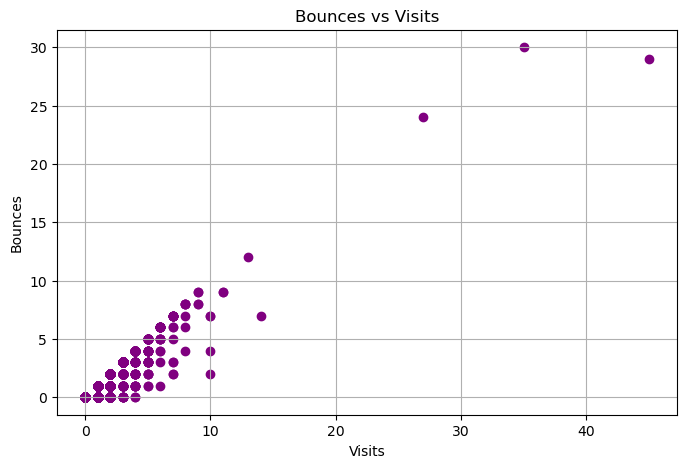

In [140]:
#Bounces vs Visits
plt.figure(figsize=(8, 5))
plt.scatter(data['Visits'], data['Bounces'], color='purple')
plt.title("Bounces vs Visits")
plt.xlabel("Visits")
plt.ylabel("Bounces")
plt.grid(True)
plt.show()

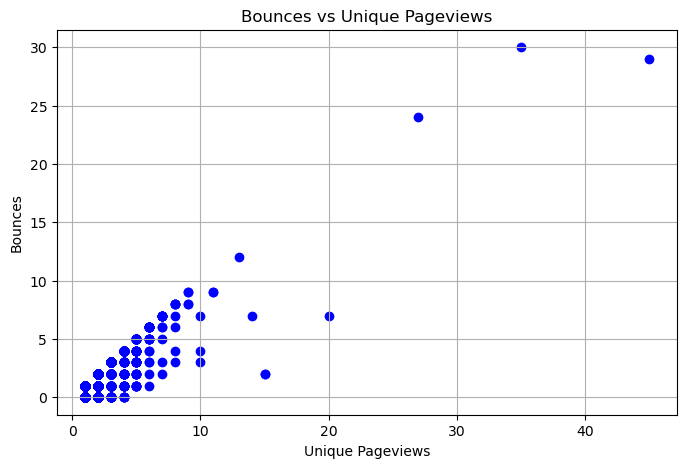

In [138]:
#Bounces vs Unique Pageviews
plt.figure(figsize=(8, 5))
plt.scatter(data['Uniquepageviews'], data['Bounces'], color='blue')
plt.title("Bounces vs Unique Pageviews")
plt.xlabel("Unique Pageviews")
plt.ylabel("Bounces")
plt.grid(True)
plt.show()

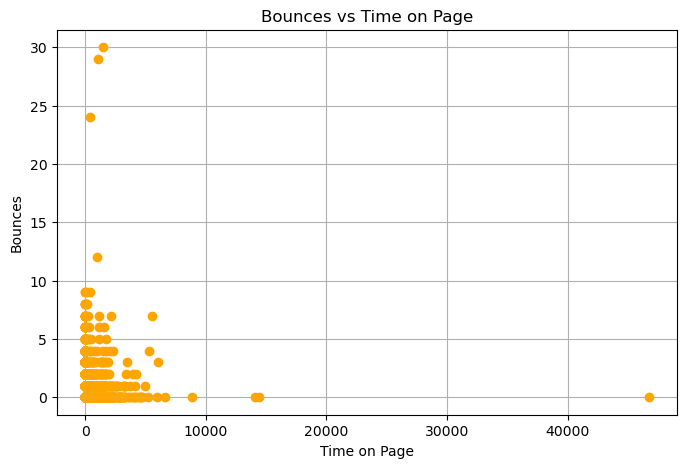

In [142]:
#Bounces vs Time on Page
plt.figure(figsize=(8, 5))
plt.scatter(data['Timeinpage'], data['Bounces'], color='orange')
plt.title("Bounces vs Time on Page")
plt.xlabel("Time on Page")
plt.ylabel("Bounces")
plt.grid(True)
plt.show()

In [146]:
continent_bounces = data.groupby('Continent')['Bounces'].mean()
continent_bounces

Continent
AF           0.719626
AS           0.731000
EU           0.713447
N.America    0.707878
OC           0.740413
SA           0.717914
Name: Bounces, dtype: float64

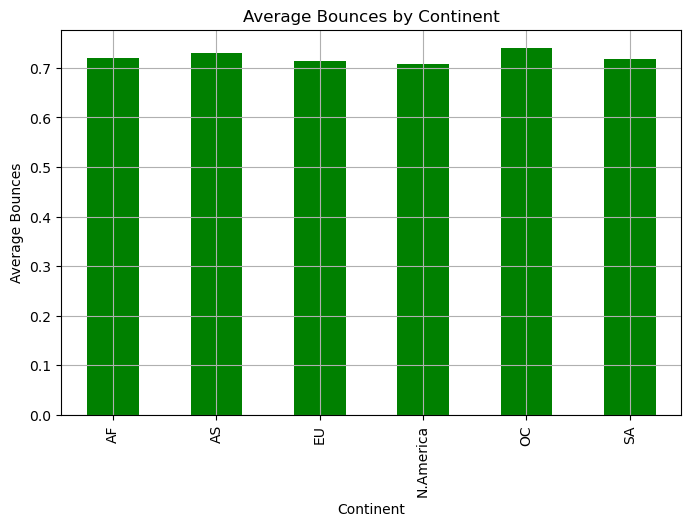

In [148]:
plt.figure(figsize=(8, 5))
continent_bounces.plot(kind='bar', color='green')
plt.title("Average Bounces by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Bounces")
plt.grid(True)
plt.show()

In [150]:
sourcegroup_bounces = data.groupby('Sourcegroup')['Bounces'].mean()
sourcegroup_bounces

Sourcegroup
(direct)                      0.832315
Others                        0.636754
facebook                      0.913043
google                        0.756455
public.tableausoftware.com    0.333087
reddit.com                    0.803571
t.co                          0.766118
tableausoftware.com           0.505444
visualisingdata.com           0.533811
Name: Bounces, dtype: float64

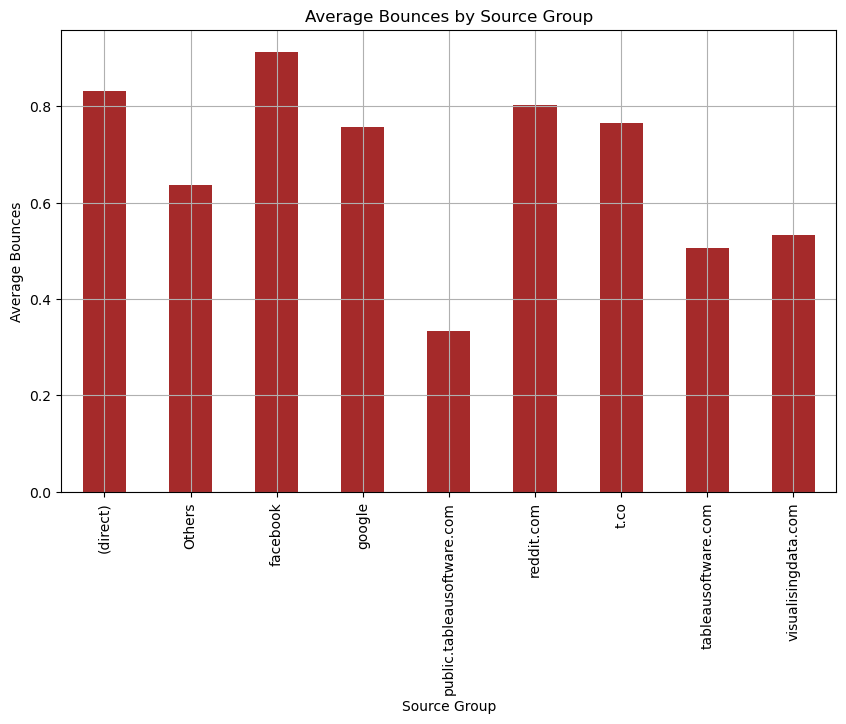

In [152]:
plt.figure(figsize=(10, 6))
sourcegroup_bounces.plot(kind='bar', color='brown')
plt.title("Average Bounces by Source Group")
plt.xlabel("Source Group")
plt.ylabel("Average Bounces")
plt.grid(True)
plt.show()